This is an easy to use single function implementation of CCDF plots, using `matplotlib.pylab` as a dependency. This would take as input a graph and output a CCDF plot. Users are able to control every other aspect of it just as if it were a `matplotlib.pylab` plot object.

gType can be loglog, semilogx, semilogy, or linear. The default is loglog base 10. 

basex and/or basey can be specified to alter the base. 



In [2]:
import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import netwulf
import random
import copy
import sys
import os
import random as rnd

#G = nx.Graph([(0,1),(0,2),(0,5),(0,6),(0,7),(0,8),(2,3),(2,5),(4,5),(3,5)])
def CCDF(G, gType='loglog', fmt = '', xlabel = 'Degree, k', ylabel = 'Pr(K>=k)', title = None, **kwargs):
    degs = nx.degree(G)
    kmax = 0
    karr = []
    for _,k in degs:
        karr.append(k)
        if(k > kmax): 
            kmax = k
    c, b = np.histogram(karr, bins=[i for i in range(kmax+2)], density=True)
    a = np.cumsum(c)
    a = np.insert(a,0,0)
    if(gType == 'loglog'):
        plt.loglog(b[1:-1], 1-a[1:-1], fmt, **kwargs)
    elif(gType == 'semilogx'):
        plt.semilogx(b[1:-1], 1-a[1:-1], fmt, **kwargs)
    elif(gType == 'semilogy'):
        plt.semilogy(b[1:-1], 1-a[1:-1], fmt, **kwargs)
    elif(gType == 'linear'):
        plt.plot(b[1:-1], 1-a[1:-1], fmt, **kwargs)
    else:
        raise Exception('gType was specified incorrectly. Please specify loglog, semilogx, semilogy, or linear.')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    return

In [3]:
# #############
# # Test code #
# #############

# G = nx.Graph([(0,1),(0,2),(0,5),(0,6),(0,7),(0,8)
#               ,(2,3),(2,5),(4,5),(3,5)])
# nx.draw(G)
# plt.show()
# CCDF(G, 'semilogx', basex = 2, fmt = '-or')
# CCDF(G, 'linear', fmt = '--gs')
# CCDF(G, ylabel = 'y axis', xlabel = 'x axis', 
#      title = 'Title', basex = 5, basey = 7)

An easy to use single function implementation of other distribution plots. It would be similar to the \texttt{seaborn.distplot} function, but it would use \texttt{matplotlib.pyplot} as a base. It would be fully customizable by the user. It would also come with the option of fitting a curve to the distribution, and choosing whether it is a histogram, scatterplot, or other form of plot.

In [4]:
# #############
# # Test code #
# #############

# # problem 1a
# fname = 'karate.gml'
# print(f'reading the network file : {fname}\n')
# ##### do not modify above here #####

# # your code goes here

# G = nx.read_gml(fname, label = None)

# CCDF(G, 'linear')

A function that allows users to easily input their own motif functions and search the network for them (for instance, the user could input a string, such as \texttt{"i, j, k, i->j, j->k, i->k, i != k"} for feed-forward loops). This function would allow for more complex motifs to be checked, and for users to specify return type to be the number of motifs, or a list of every node i for which there exists the inputted motif, or an array containing how many times that motif occurs per node (for instance, if the motif occurred for nodes 2, 3, and 5, and twice for node 6, the outputted array would be [0, 1, 1, 0, 1, 2]). There would also be an option to return a 2-D array with the first column being the values of all nodes that have the motif and the second being the previously mentioned output, excluding arrays that don't have the motif.


A function that returns the number of feed-forward loop motifs, and the number of feedback loop motifs, with customization options similar to the function above.

In [5]:

#fname = 'karate.gml'




#G = nx.read_gml(fname, label = None)

def fbl_count(G):
    count = 0
    tempG = G
    for i in tempG.edges:
            for j in tempG.edges(nbunch = i[1]):
                for k in tempG.edges(nbunch = j[1]):
                    if(k[1] == i[0]):
                        count = count + 1
    return (int)(count / 3)
def ffl_count(G):
    count = 0
    tempG = G
    for i in tempG.edges:
            for j in tempG.edges(nbunch = i[1]):
                for k in tempG.edges(nbunch = i[0]): 
                    if(j[1] == k[1]):
                        count = count + 1
    return count


# ## This function ignores subgraph isomorphisms? (maybe output this thingy to a new graph only
# ## consisting of the things and then do stuff)

# #motif = nx.DiGraph([(0,1),(1,2),(2,0)])
# motif = nx.DiGraph([(0,1),(1,2),(0,2)])
# fname = 'metabolism_afulgidus.gml'
# print(f'reading the network file : {fname}\n')
# ##### do not modify above here #####
# G = nx.read_gml(fname, label = None)
# #G = nx.DiGraph([(0, 1),(0,2),(0,3),(1,2),(1,3),(2,3)])
# nx.draw_networkx(motif,arrows=True,with_labels=True,node_size=600,node_color='r',width=2)
# plt.show()
# nx.draw_networkx(G,arrows=True,with_labels=True,node_size=600,node_color='r',width=2)
# plt.show()

def nodes_connected(G, u, v): ## This is so annoying. like seriously why isn't this implemented already guys. smh.
    return v in G.neighbors(u)

#print(nodes_connected(motif, 0, 1))
#print(nodes_connected(motif, 1, 0))

#SPECIFY TYPE eg type='list', type='count', etc.
def motif_count_3d(G, motif, rtype = 'list'):
    # step 1: get a matrix from the motif thing.
    connection_list = []
    big_list = []
    mo_matrix = nx.to_numpy_matrix(motif)
    #return mo_matrix
    big_sum = np.sum(mo_matrix)
    mo_matrix = np.array(mo_matrix)
    #len(mo_matrix) = 3
    small_list = []
    count=0
    for i in G.nodes():
        for j in G.nodes(): 
            for k in G.nodes():
                if(i != j and j != k and i != k):
                    #check interconnected counts
                    if(np.sum(nx.to_numpy_matrix(G.subgraph([i, j, k]))) >= big_sum):
                            #big_list.append([i, j, k])
                            i2 = [i, j, k]
                            yeet = True
                            for j2, k2 in enumerate(mo_matrix):
                                #print(j)
                                for l2, m2 in enumerate(k2):
                                    if(m2 != 0):
                                        if not nodes_connected(G, i2[j2], i2[l2]):
                                            yeet = False
                            #print(yeet)
                            if yeet == True:
                                #print("worked")
                                small_list.append(i2)
#                                 if(count % 1000 == 0):
#                                     print(count)
                                sys.stdout.write('\r')
                                sys.stdout.write(str("Number so far: " + str(count)))
                                sys.stdout.flush()
                                count+=1
    if(rtype == 'list'):
        return small_list
    else:
        return(len(small_list))

# big_list = motif_count_3d(G, motif)

# print(big_list)
# print(len(big_list))

In [6]:
#[[0. 1. 1.]
# [0. 0. 1.]
# [0. 0. 0.]] for FFLs. 

# [[0. 1. 0.]
#  [0. 0. 1.]
#  [1. 0. 0.]] for FBLs.

import os

In [7]:
#print(ffl_count(G))
#print(fbl_count(G))

In [8]:
#import copy
#import random as rnd

In [9]:
def drawGz(G,z, colors=None, nsize = 600, flabel = True, orderthresh = 50, orderthreshsize = 100, width = 2, **kwargs):
    if(colors == None):
        colors = ['#d61111','#11c6d6','#d67711','#11d646','#1b11d6','#d611cc'] # map node labels to colors (for the visualization)
    node_colors = []
    for i in G.nodes():
        node_colors.append(colors[int(z[i])])
    if G.order() > orderthresh:
        nsize  = orderthreshsize
    nx.draw_networkx(G,with_labels=flabel,node_size=nsize,width=width,node_color=node_colors, **kwargs) # draw it pretty
    limits=plt.axis('off')                                      # turn off axes
    plt.show() 
    return

In [10]:
def DCSBM(G, reps = 20, groups = 2, maxphase = 30, output = 'all'):

    ####################################

    # Begin function definition block #

    ###################################

    def random_z(n,c):
        random.seed()
        z = np.zeros([n,1], dtype=int)
        for i in range(0, n):
            z[i] = np.floor(random.random() * c)
        return z

    def tabulate_ek(G,z,c):
        ers = np.zeros([c,c])
        kpr = np.zeros([c,1])
        for i in np.unique(z):
            for j in np.unique(z):
                c = 0
                for k, l in enumerate(z):
                    if(l == i):
                        for m in G.edges(k):
                            if(z[m[1]] == j):
                                c = c + 1
                ers[i][j] = c
        kpr = np.sum(ers, axis=1)
        return ers,kpr

    def dcsbm_LogL(ers,kpr):
        c = ers.shape[1] 
        logL = 0
        for r in range(c):
            for s in range(c):
                if(ers[r,s] < 1 or kpr[r] < 1 or kpr[s] < 1):
                    temp = 0
                else:
                    temp = ers[r,s] * np.log(ers[r,s] / (kpr[r]*kpr[s]))
                logL = logL + temp
        return logL
        

    def makeAMove(G,z,c,f):
        bestL    = -np.inf         
        bestMove = [-1 -1]        
        for i in G.nodes():
            #print(z)
            if f[i] == 0:         
                s = int(z[i])      
                for r in range(c): 
                    z2 = copy.deepcopy(z)
                    z2[i] = r
                    y = tabulate_ek(G,z2,c)
                    x = dcsbm_LogL(y[0], y[1])
                    if bestL < x:
                        bestL = x
                        bestMove = [i, r]
        return bestL,bestMove
    
    def clear():
        os.system( 'cls' )
        os.system('clear')
    
    def drawGz(G,z):
        colors = ['#d61111','#11c6d6','#d67711','#11d646','#1b11d6','#d611cc']
        node_colors = []
        for i in G.nodes():
            node_colors.append(colors[int(z[i])])
        nsize  = 600
        flabel = True

        if G.order() > 50:
            nsize  = 100
            flabel = False

        nx.draw_networkx(G,with_labels=flabel,node_size=nsize,width=2,node_color=node_colors) # draw it pretty
        limits=plt.axis('off')                                      # turn off axes
        plt.show() 

        return

    ##################################

    # End function definition block #

    #################################

   
    countt = 0
    LL = []    
    Lstarz = []
    zstarz = []
    while(reps != 0):
        c  = groups 
        n  = G.order()
        T  = maxphase 
        Lt = np.zeros([1,(n+1)]) 
        zt = np.zeros([n,(n+1)], dtype=int)
        flag_converged = 0 
        z       = random_z(n,c) 
        ers,kpr = tabulate_ek(G,z,c) 
        Lt[0,0] = dcsbm_LogL(ers,kpr) 
        zt[:,0] = z[:,0]              
        LL.append(Lt[0,0])            
        pc = 0  
        while not flag_converged:
            f     = np.zeros([n,1],dtype=int)  
            if(pc == 0):
                Lstar = -np.inf 
                zstar = zt[:,0] 
                LL = []
            Lstar1 = copy.deepcopy(Lstar)
            for j in range(n):
                b = np.transpose(zt)[j]
                h = makeAMove(G, b, c, f)
                f[h[1][0]] = 1 
                LL.append(h[0])
                zstar[h[1][0]] = h[1][1] 
                cc = np.transpose(zt)
                cc[j+1] = zstar
                zt = np.transpose(cc)
            Lstar = max(LL)
            if(Lstar <= Lstar1):
                flag_converged = 1
            pc = pc + 1
            T = T - 1
            if(T == 0):
                break
        Lstarz.append(Lstar)
        zstarz.append(zstar)
        val = Lstar
        countt += 1
        reps -= 1
        clear()
        sys.stdout.write('\r')
        sys.stdout.write(str("Number of reps completed: " + str(countt) + '\r'))
        sys.stdout.flush()
    print()
    Lstar = max(Lstarz)
    zstar = zstarz[Lstarz.index(max(Lstarz))]
    if(output == 'all' or output == 'L'):
        print("Optimal L: " + str(Lstar))
    if(output == 'all' or output == 'graph'):
        drawGz(G,zstar)
    return zstar

In [11]:
# do number of sims and depth of each sim as parameters. 

# fname1 = 'karate.gml'
# Go     = nx.read_gml('./' + fname1, label='id')
# G      = nx.convert_node_labels_to_integers(Go) # map node names to integers (0:n-1) [because indexing]

# DCSBM(G, groups = 3)

In [12]:
def mean_degree(G, out = True):
    c = 0
    for i in G.nodes():
        try:
            if(out == True):
                c = c + G.out_degree(i)
            else:
                c = c + G.degree(i)
        except:
            c = c + G.degree(i)
    return c / G.number_of_nodes()

1.0


/home/kaden/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/kaden/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


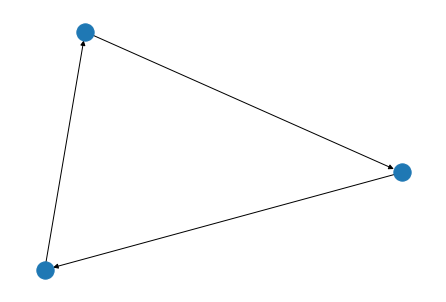

In [13]:
G = nx.DiGraph([(0,1),(1,2),(2,0)])
nx.draw(G)
print(mean_degree(G, out = True))

In [14]:
def Plague(G = None, Gtype = 'erdos', erdosval = 0.15, node_num = 50, mode = 'Game', ethics = 'Good', difficulty = 'Brutal', 
           starttype = 'random', starters = None, numstarters = 4, vaccines = 'on', quarantines = 'on', antivax = 0, 
          vaxcost = 100, startermoney = 500, allowance = 200, quarantinecost = 300, beta = 0.6, gamma = 0.3, curechance = 0, icost = 50, 
          dcost = 50, ccost = 300, zcost = 400, betainc = 0.02, gammadec = 0.02, campchance = 0.1):
    turnNum = 0
    money = startermoney
    gameOver = False
    if((mode != 'Game' and mode != 'Simulation') or (Gtype != 'erdos') or (difficulty != 'Baby' and difficulty != 'Custom' and 
                                                                          difficulty != 'Normal' and
                                                                          difficulty != 'Brutal' and
                                                                          difficulty != 'Mega Brutal' and
                                                                          difficulty != 'Impossible') or
      (starttype != 'random' and starttype != 'choice' and starttype != 'high degree') or (vaccines != 'on' and vaccines != 'off') or
      (quarantines != 'on' and quarantines != 'off')):
        raise Exception("Something is wrong with your inputs. ")
    if(starters != None):
        numstarters = len(starters)
    if(difficulty == 'Baby'):
        if(ethics == 'Good'):
            startermoney = 600
            allowance = 300
            vaxcost = 100
            quarantinecost = 300
            beta = 0.5
            gamma = 0.5
        if(ethics == 'Evil'):
            G = nx.erdos_renyi_graph(30, 0.25)
            startermoney = 600
            allowance = 300
    if(difficulty == 'Normal'):
        if(ethics == 'Good'):
            startermoney = 500
            allowance = 250
            beta = 0.5
            gamma = 0.25
        if(ethics == 'Evil'):
            G = nx.erdos_renyi_graph(40, 0.15)
            startermoney = 500
            allowance = 150
    if(difficulty == 'Brutal'):
        if(ethics == 'Good'):
            startermoney = 500
            allowance = 150
            beta = 0.6
            gamma = 0.25
        if(ethics == 'Evil'):
            G = nx.erdos_renyi_graph(40, 0.05)
            startermoney = 500
            allowance = 100
        
        
    
        
    if(G == None):
        G = nx.erdos_renyi_graph(node_num, erdosval)
    if(difficulty == 'Mega Brutal'):
        if(ethics == 'Good'):
            G = nx.erdos_renyi_graph(70, 0.08)
            startermoney = 500
            allowance = 100
            vaxcost = 100
            quarantinecost = 300
            beta = 0.75
            gamma = 0.1
            antivax = 0.2
            numstarters = 4
            starttype = 'random'
            campchance = 0.1
        # 4 random starters
        if(ethics == 'Evil'):
            G = nx.erdos_renyi_graph(70, 0.05)
            startermoney = 400
            allowance = 100
            icost = 50 
            dcost = 50
            ccost = 300
            zcost = 400
            betainc = 0.02
            gammadec = 0.02
            numstarters = 3
            starttype = 'random'
    if(difficulty == 'Impossible'):
        if(ethics == 'Good'):
            G = nx.erdos_renyi_graph(70, 0.15)
            startermoney = 200
            allowance = 50
            vaxcost = 100
            quarantinecost = 300
            beta = 1
            gamma = 0.1
            antivax = 0.4
            numstarters = 6
            starttype = 'high degree'
            campchance = 0.1
        if(ethics == 'Evil'):
            G = nx.erdos_renyi_graph(70, 0.02)
            startermoney = 200
            allowance = 50
            icost = 50 
            dcost = 50
            ccost = 300
            zcost = 400
            betainc = 0.02
            gammadec = 0.02
            numstarters = 1
            starttype = 'random'
    

    if(mode == 'Simulation'):
        vaccines = 'off'
        quarantines = 'off'
        ethics = 'Good'
    
    # numstarters
    z = np.zeros(G.number_of_nodes())
    
    # Tested all start types. Works. 
    
    if(starttype == 'random'):
        #initialize z randomly
        a = random.sample(range(0, G.number_of_nodes()), numstarters)
        for i in a:
            z[i] = 1
        #print(z)
    elif(starttype == 'high degree'):
        count = copy.deepcopy(numstarters)
        finals = []
        eye = []
        jay = []
        for i in G.nodes():
            eye.append(i)
            jay.append(G.degree[i])
        #print(jay)
        while(count != 0):
            loc = jay.index(max(jay))
            finals.append(loc)
            #print(loc[0])
            jay[loc] = -1
            count -= 1
            #print(count)
            #print(jay)
        for i in finals:
            #print(i)
            z[i] = 1
        #print(z)
        #print(jay)
    elif(starttype == 'choice'):
        for i in starters:
            z[i] = 1
        #print(z)
    
    
    def Menu():
        if(ethics == 'Good'):
            print('Turn number - ' + str(turnNum))
            print('Money - ' + str(money))
            print('\nCommands: ')
            print('N - Visualize netwulf representation')
            if(quarantines == 'on'):
                print('Q - Quarantine a node')
            if(vaccines == 'on'):
                print('V - Vaccinate a node')
            print('P - Progress to the next turn')
            print('H - View the help menu')
            print('E - Exit the game')
        elif(ethics == 'Evil'):
            print('Turn number - ' + str(turnNum))
            print('Money - ' + str(money))
            print('\nCommands: ')
            print('N - Visualize netwulf representation')
            print('I - Make your disease more infectious')
            print('D - Make your disease less deadly')
            print('C - Create an anti-vaxx marketing campaign')
            print('Z - Infect a node')
            print('P - Progress to the next turn')
            print('H - View the help menu')
            print('E - Exit the game')
        else:
            raise Exception("ethics is not correctly specified.")
        inp = input()
        return(inp)
    while(gameOver == False): #start of a turn
        #print("are you looping")
        turnNum += 1
        money += allowance
        turnOver = False
        while(turnOver == False):
            inp = Menu()
            if(inp == 'N'):
                netwulf.visualize(zToG(G, z))
            elif(inp == 'P'):
                turnOver = True
            elif(inp == 'E'):
                raise Exception("You are a quitter.")
            elif(inp == 'H'):
                print("A few tips:")
                print("In the netwulf interface, press 'post to python' to exit. Otherwise it might glitch.")
                print("Green nodes are susceptible, yellow nodes are infected, and red nodes are dead.")
                print("Blue nodes are immune, black nodes are quarantined, and pink nodes are anti-vaxx.")
                print("Quarantined nodes update at the end of each turn.")
                print("More information can be found on the github page: https://github.com/thekadenh/betternx/")
            if(ethics == 'Good'):
                if(inp == 'Q'):
                    yn = input(str("Do you want to quarantine a node for $" + str(quarantinecost) + "? (y/n)"))
                    if(yn == 'y'):
                        if(money >= quarantinecost):
                            money -= quarantinecost
                            q = input("Which node do you want to quarantine? ")
                            q = int(q)
                            zq = z[q]
                            if(zq == 2):
                                print(str(q) + " is literally dead. You're quarantining a dead person. Nice one.")
                            if(zq == 3):
                                print(str(q) + " can't get the virus. No idea why you're quarantining it but you do you.")
                            if(zq == 4):
                                print("I mean... technically you CAN quarantine " + str(q) + " twice... It's not against the rules or anything...")
                            if(zq == 5):
                                print("Excellent choice")
                                z[q] = 4
                            else:
                                z[q] = 4
                        else:
                            print("Sorry, you're too poor")
                    
                elif(inp == 'V'):
                    yn = input(str("Do you want to vaccinate a node for $" + str(vaxcost) + "? (y/n)"))
                    if(yn == 'y'):
                        if(money >= vaxcost):
                            money -= vaxcost
                            q = input("Which node do you want to vaccinate? ")
                            q = int(q)
                            zq = z[q]
                            if(zq == 1):
                                print(str(q) + " is already infected, dummy. Vaccination doesn't do anything at this point.")
                            elif(zq == 2):
                                print(str(q) + "... They're dead.")
                            elif(zq == 3):
                                print("You make... questionable... decisions.")
                            elif(zq == 4):
                                print("They're quarantined.")
                            elif(zq == 5):
                                print("They refuse, citing the 100% true nonrefutable fact that vaccinations cause autism.")
                            else:
                                z[q] = 3
                        else:
                            print("Sorry, you're too poor")
            elif(ethics == 'Evil'):
                if(inp == 'I'):
                    yn = input(str("Do you want to increase beta by " + str(betainc) + " for $" + str(icost) + "? (y/n)"))
                    if(yn == 'y'):
                        if(money >= icost):
                            beta = beta + betainc
                            money -= icost
                        else:
                            print("Sorry, you're too poor")
                elif(inp == 'D'):
                    yn = input(str("Do you want to decrease gamma by " + str(gammadec) + " for $" + str(dcost) + "? (y/n)"))
                    if(yn == 'y'):
                        if(money >= dcost):
                            gamma = gamma - gammadec
                            money -= dcost
                        else:
                            print("Sorry, you're too poor")
                elif(inp == 'C'):
                    yn = input(str("Do you want to fund an anti-vax campaign for $" + str(ccost) + "? (y/n)"))
                    if(yn == 'y'):
                        if(money >= ccost):
                            money -= ccost
                            for i in G.nodes():
                                if(z[i] == 0):
                                    if(random.random() < campchance):
                                        z[i] == 5
                        else:
                            print("Sorry, you're too poor")
                            
                elif(inp == 'Z'):
                    yn = input(str("Do you want to infect ANY node for $" + str(zcost) + "? (y/n)"))
                    if(yn == 'y'):
                        if(money >= zcost):
                            money -= zcost
                            nod = input(str("Which node would you like to infect?"))
                            nod = int(nod)
                            znod = z[nod]
                            if(znod == 2):
                                print("You brought back node " + str(nod) + " from the dead. The zombie apocalypse is imminent!")
                                z[nod] = 1
                            if(znod == 3):
                                print("You used voodoo magic to anti-vaccinate node " + str(nod) + ".")
                                z[nod] = 1
                            if(znod == 4):
                                print("You successfully broke node " + str(nod) + " out of the quarantine!")
                                z[nod] = 1
                            if(znod == 5):
                                print("I mean... node " + str(nod) + " basically wanted to get infected anyway")
                                z[nod] = 1
                            else:
                                z[nod] = 1
                        else:
                            print("Sorry, you're too poor")
        
        # at the end of the turn cycle through the quarantined ones and separate the edges. 
#         bunch=[(1,2),(2,3)]
#         G.remove_edges_from(ebunch)
            if(turnOver == True):
                for i, j in enumerate(z):
                    if(j == 4):
                        for k in G.nodes():
                            G.remove_edges_from([(i, k)])
                #Then, run a cycle of the thingy
                z2 = copy.deepcopy(z)
                for i, j in enumerate(z):
                    if(j == 1): # it's infected, time to spread!
                        for k in G.edges(i):
                            if(z[k[1]] == 0 or z[k[1]] == 5):
                                if(random.random() < beta):
                                    z2[k[1]] = 1
                        if(random.random() < gamma):
                            z2[i] = 2
                z = z2
                if not 1 in z:
                    gameOver = True
    #drawGz(G, z)
    sus = 0
    dead = 0
    recovered = 0
    qud = 0
    antvd = 0
    for i in z:
        if(i == 0):
            sus+=1
        if(i == 2):
            dead+=1
        if(i == 3):
            recovered+=1
        if(i == 4):
            qud+=1
        if(i == 5):
            antvd+=1
    print("Game over! Thanks for playing.")
    print("I'm not going to tell you how well you did. That's for you to decide.")
    print("However, these stats may offer some insight.\n")
    print("# Susceptible: " + str(sus))
    print("# Dead: " + str(dead))
    print("# Vaccinated or recovered: " + str(recovered))
    print("# Quarantined: " + str(qud))
    print("# Alive Anti-vaxxers: " + str(antvd))
    
   

In [15]:
#Plague(node_num=10)